# About
Squid games actors face recognition

This project's aim is to recognize faces of main cast in the tv series "Squid Games".

Data was collected by batch downloading from google images results. Then files were manually checked to ensure that images contain faces of corresponding actors. Many images contain several actors in questuon at once.

This project consist of 2 parts:
1) Face detection - Squid Games actors (part 1)
In this part, based on Haar cascade, the faces of actors from Squid Games will be detected and cropped. Since some images contain many faces, manual classification will be required. All cropped faces will be labeled by the names of the actors.
2) Classification - Squid Games actors (part 2)
In this part, cropped images of the faces of the actors from Squid Games will be used for model training that recognizes who is this actor.

Actors:
- Heo Sung-tae
<br>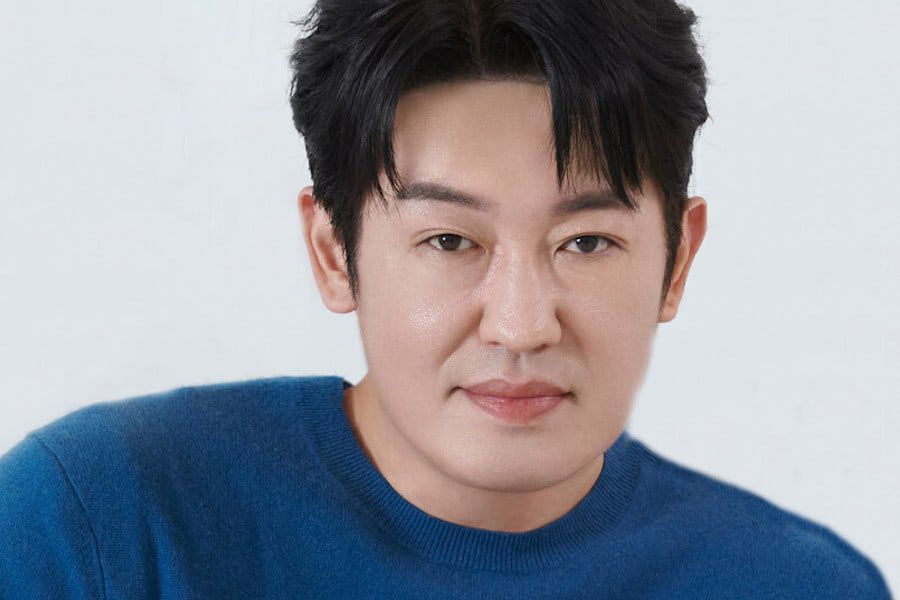
- HoYeon Jung
<br>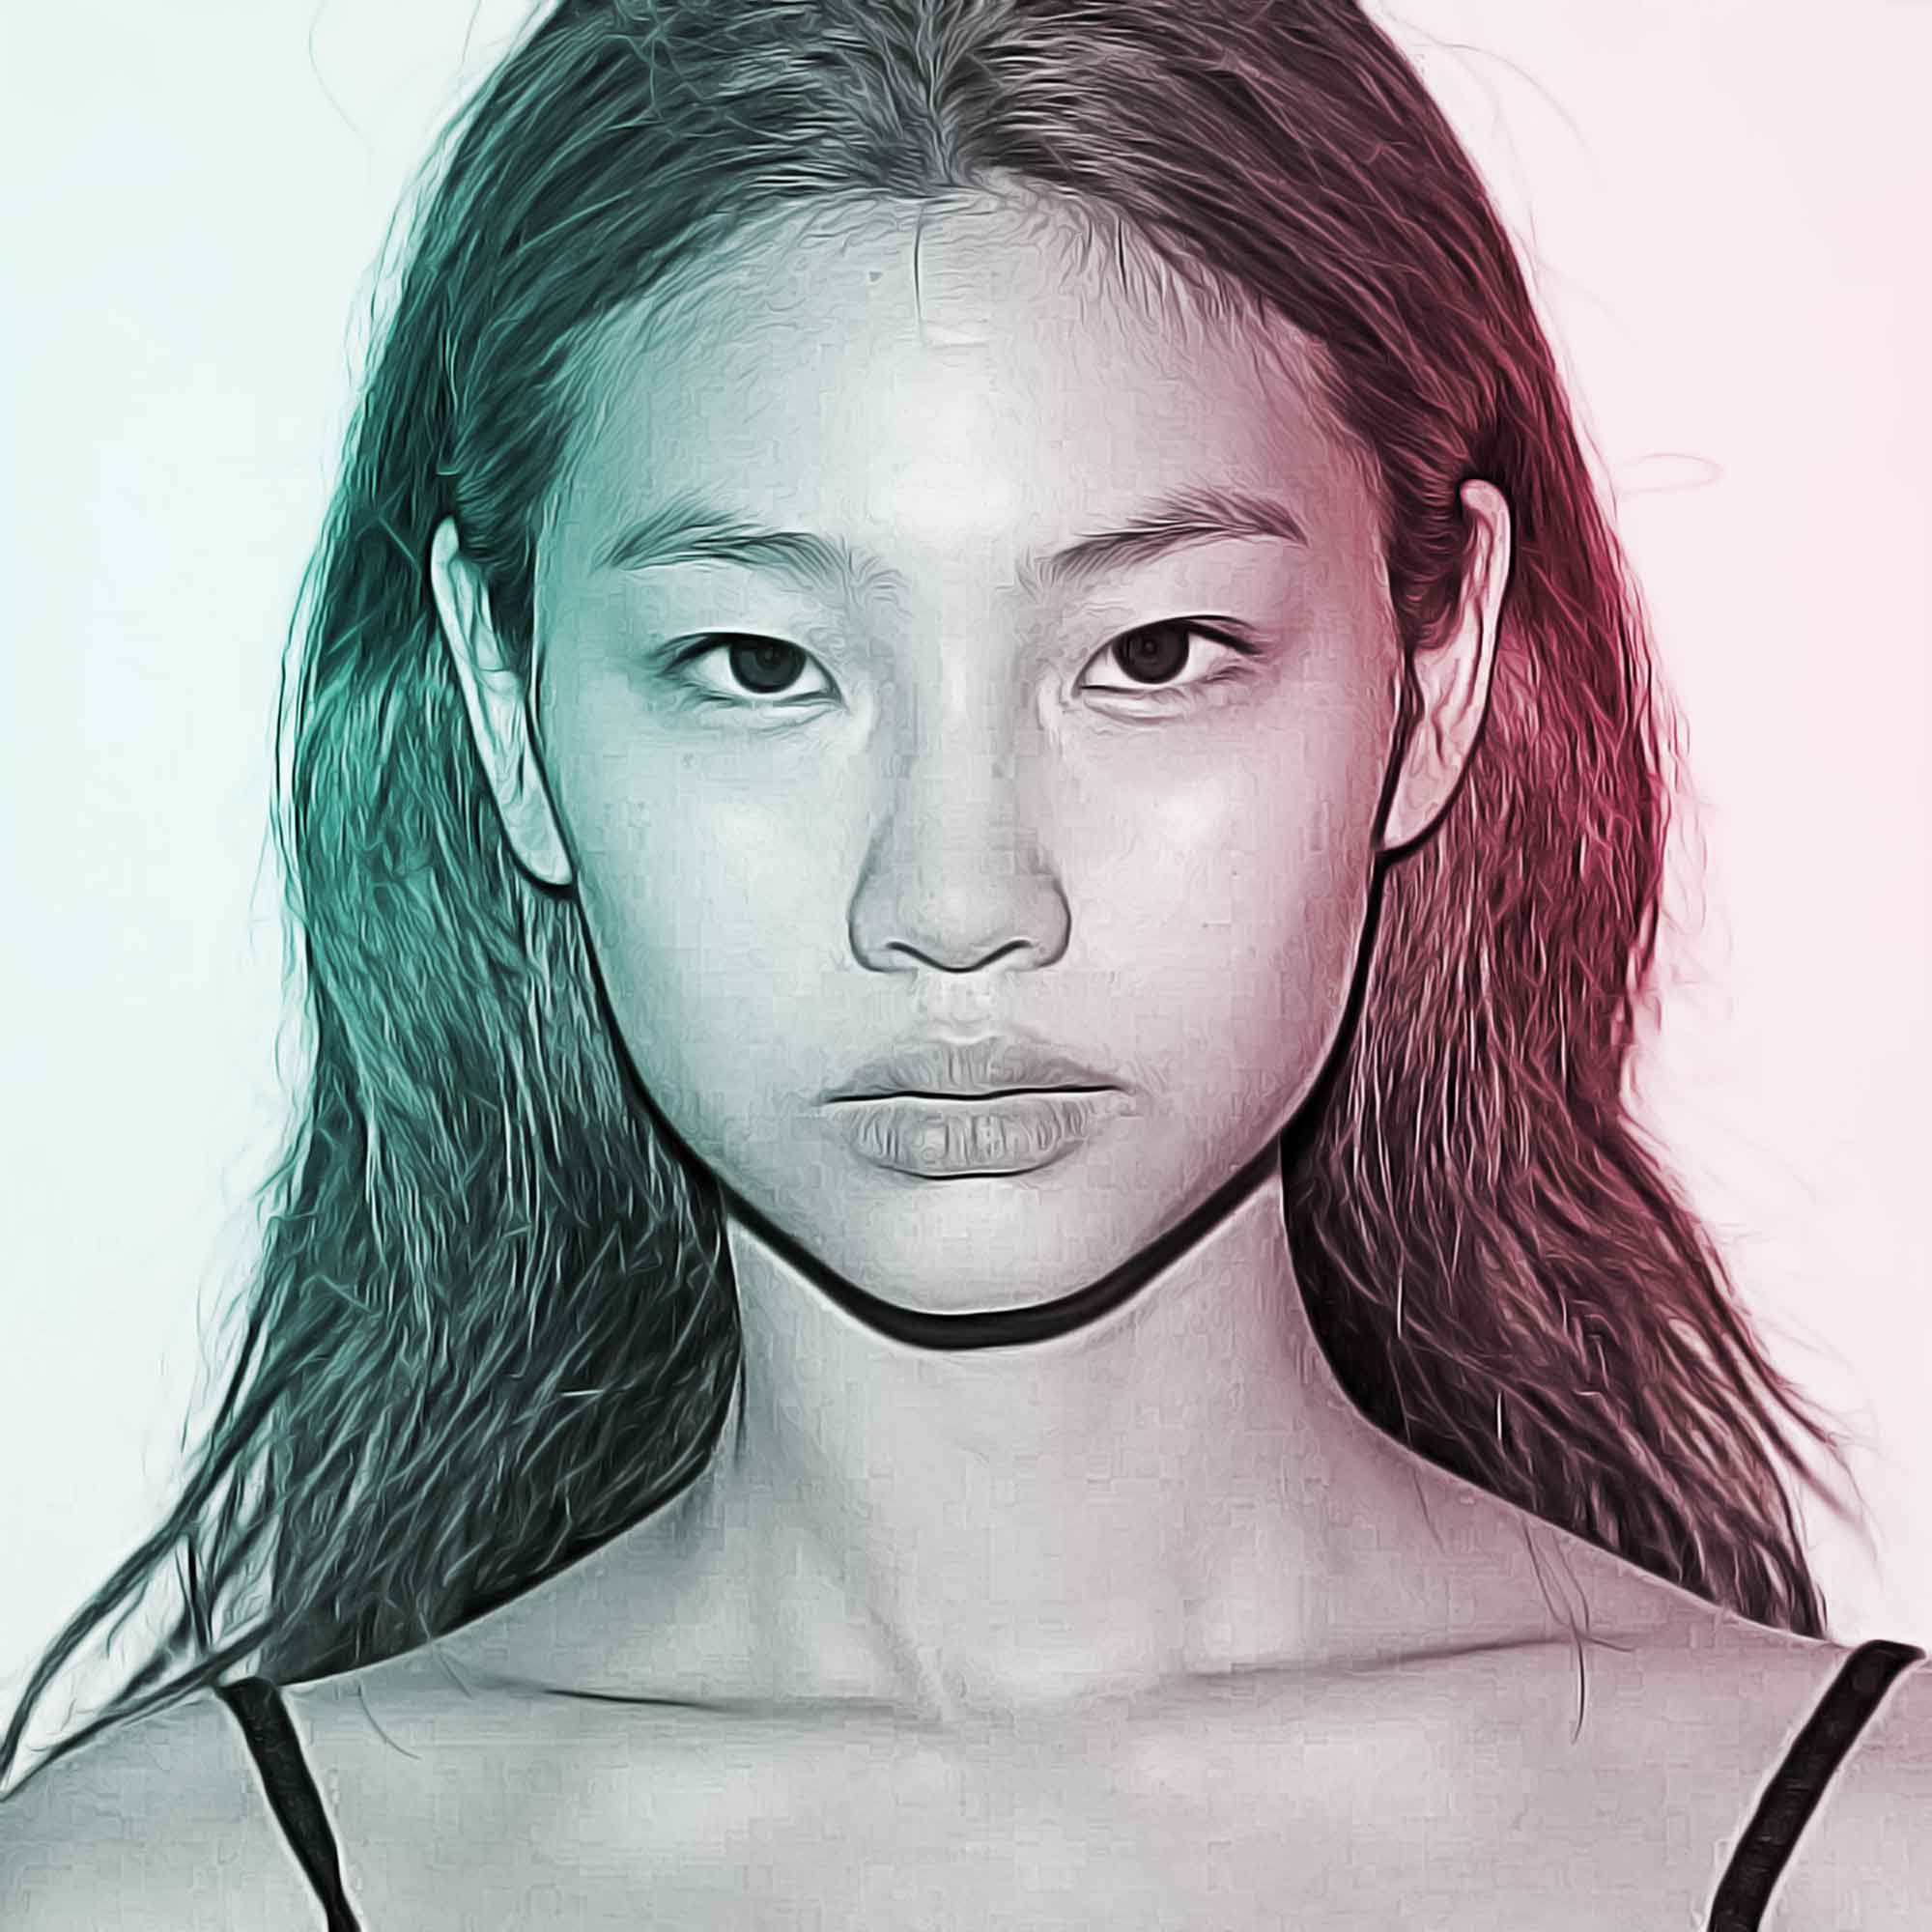
- Kim Joo-Ryung
<br>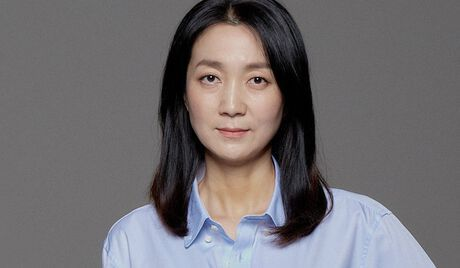
- Lee Yoo-Mi
<br>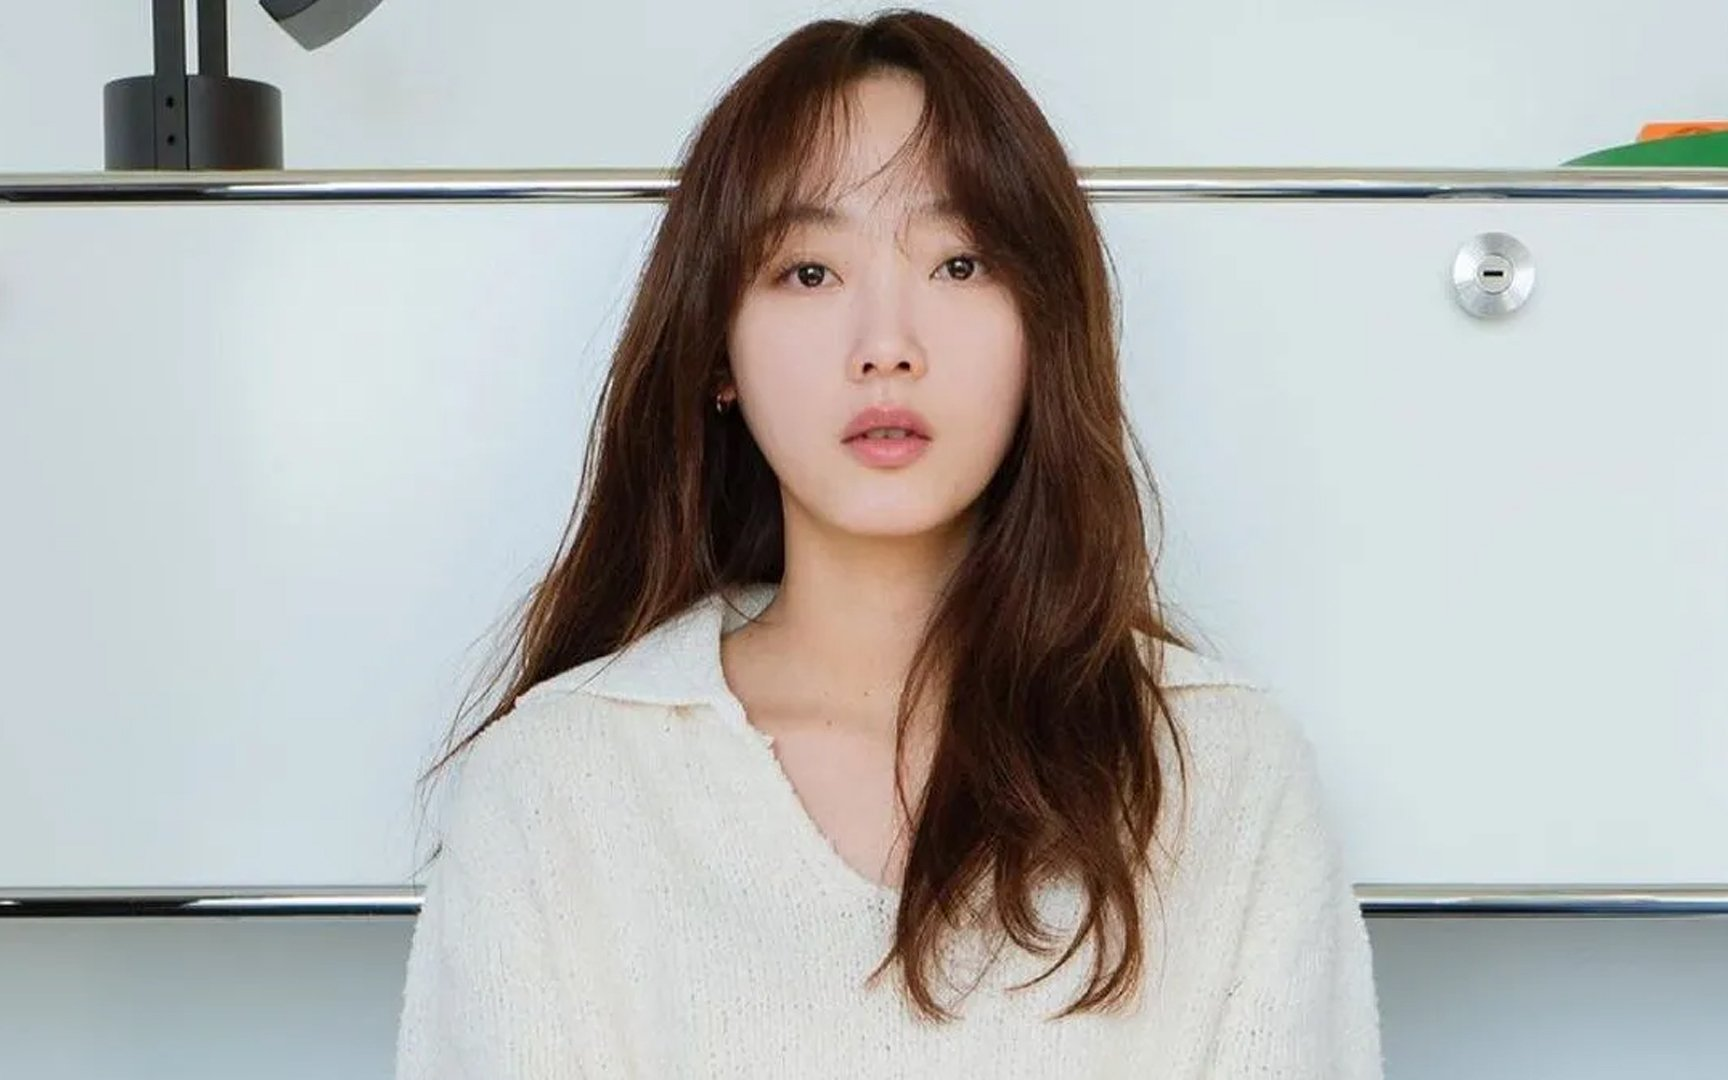
- Oh Yeong Su
<br>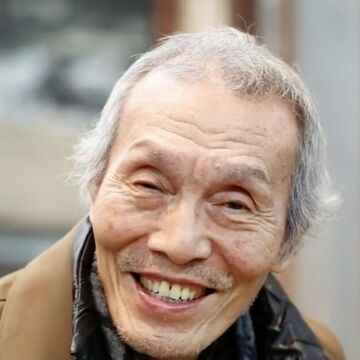
- Park Hae-soo
<br>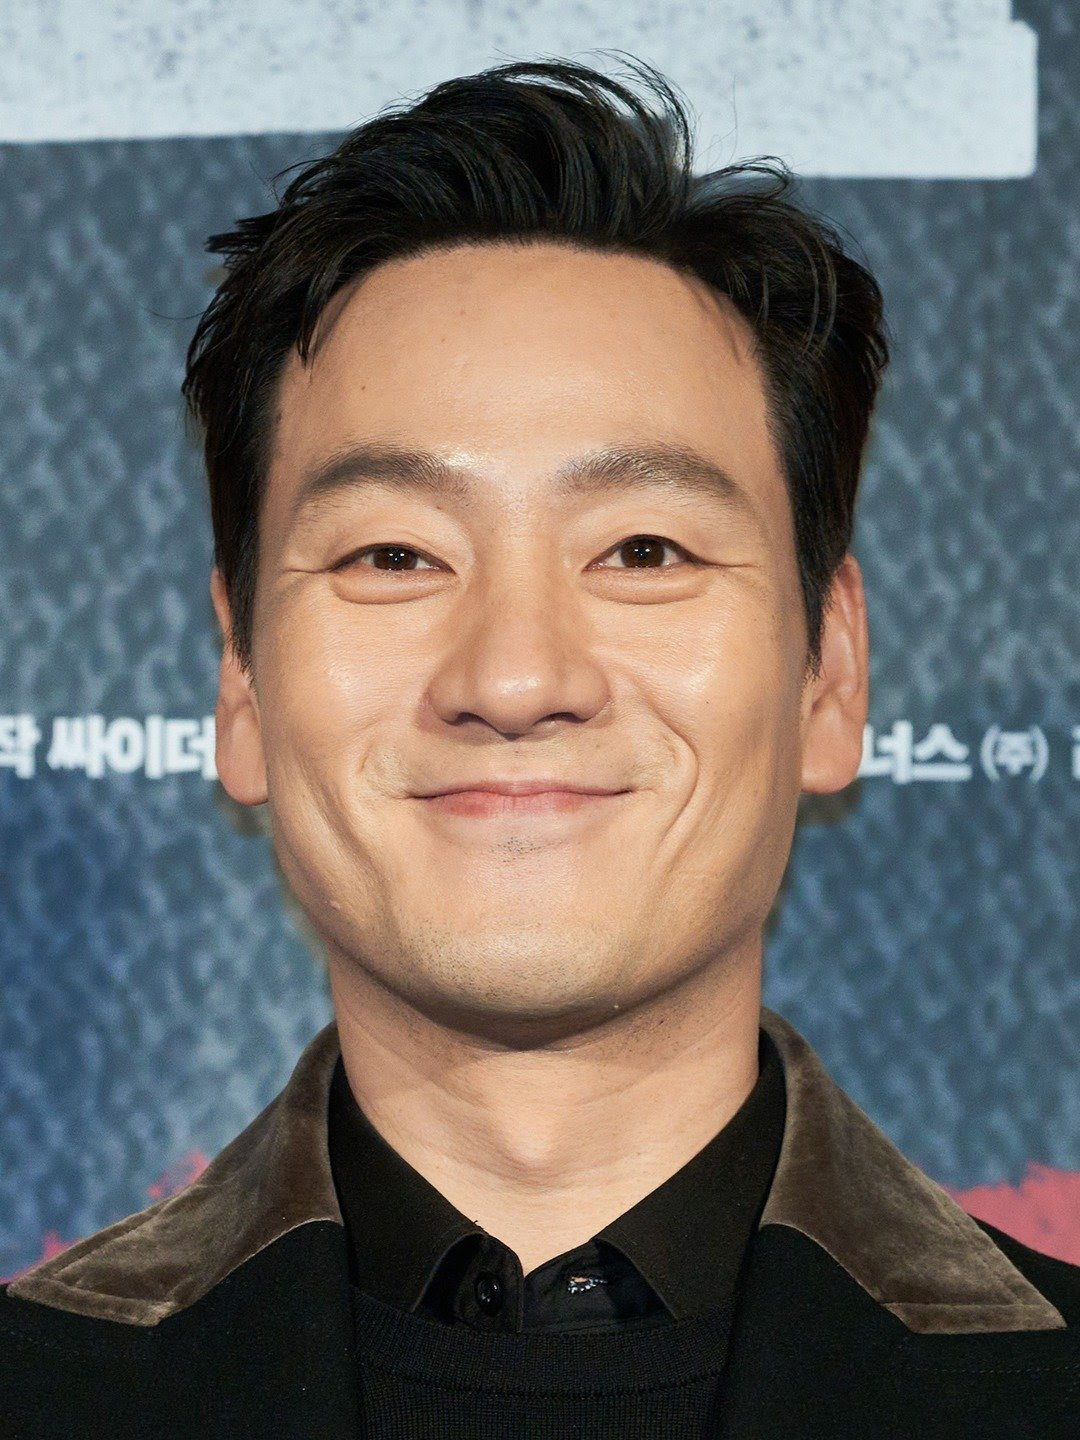
- Seung Gi
<br>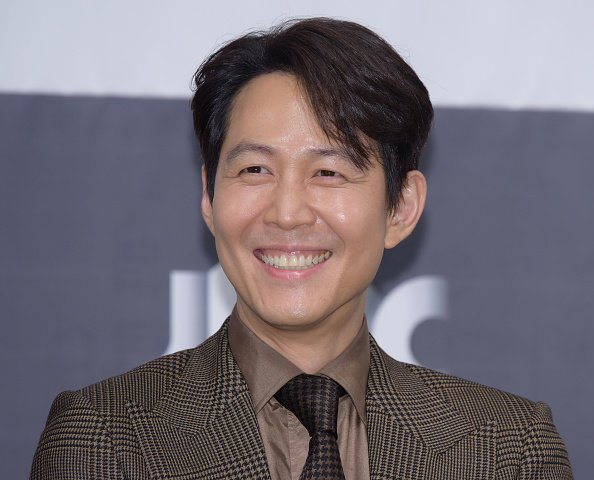
- Wi Ha-joon
<br>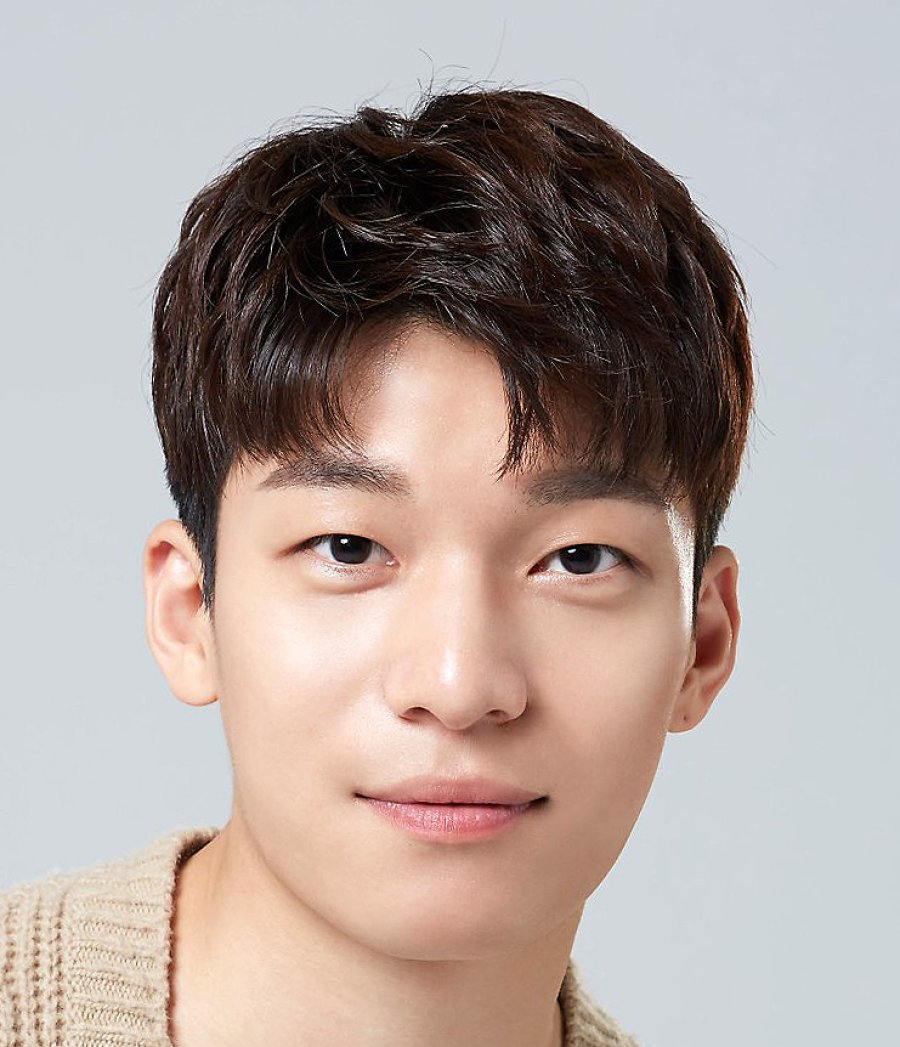

# Image cleaning - Squid Games actors (part 1)

## Import modules

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

## Open test image

In [2]:
img = cv2.imread('.\pictures_raw_data\Seung Gi\Seong Gi-hun _ Heroes Wiki _ Fandom.jpg')
img.shape

(3803, 3803, 3)

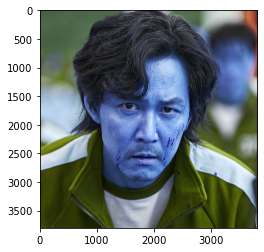

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
gray.shape

(3803, 3803)

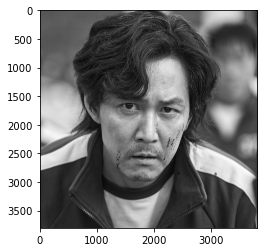

In [5]:
plt.imshow(gray, cmap='gray')

# Face detection by Haar Cascade

## Visualize Haar Cascade

Apply pre-trained models of Haar feature-based cascade classifiers. This methods was developed in 2001. Here is the link to the corresponding publication: https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf.

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 913,  989, 1896, 1896]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(913, 989, 1896, 1896)

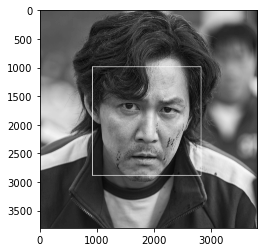

In [8]:
face_img = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img, cmap='gray')

[[ 913 1154   22   22]
 [ 772 1146   25   25]
 [1320 1377   24   24]
 [1365 1436   32   32]
 [ 876 1705   48   48]
 [1105 1075   23   23]
 [ 774 1084   24   24]
 [ 818 1096   24   24]
 [ 451  511  374  374]
 [1097  552  421  421]
 [1479 1277   23   23]]


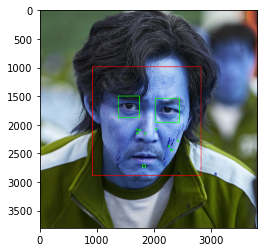

In [9]:
# this code detect eyes with face region
# copied from opencv documentation

# cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img)
plt.show()

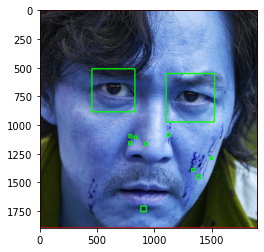

In [10]:
plt.imshow(roi_color)

## Create function to crop images
All images will be cropped to their face region if two eyes are detected as well. For that, a function will be defined.

In [11]:
def crop_face(file_path):
    """
    Input: file_path
    
    Output: cropped colored image that shows a face where 2 eyes are detected
    """
    # remember that face_cascade and eye_cascade were defined earlier
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]        
        return roi_color

This instance of the crop_face function will return errors. If two eyes are not detected. Also eye cascade do not work well as seen from the picture of Seung Gi.

### Test crop function

#### Single face in image

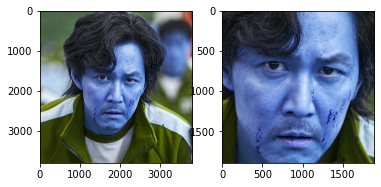

In [12]:
# single face
file_path = '.\pictures_raw_data\Seung Gi\Seong Gi-hun _ Heroes Wiki _ Fandom.jpg'
plt.subplot(1,2,1)
plt.imshow(cv2.imread(file_path))

plt.subplot(1,2,2)
plt.imshow( crop_face(file_path) )

#### Multiple faces in image

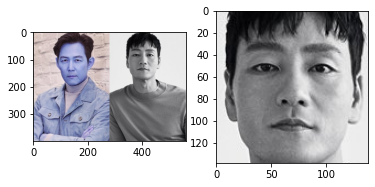

In [13]:
# multiple faces
file_path = '.\pictures_raw_data\Seung Gi\Squid Game_ Confirms Lee Jung-jae.jpg'
plt.subplot(1,2,1)
plt.imshow(cv2.imread(file_path))

plt.subplot(1,2,2)
plt.imshow( crop_face(file_path) )

In [14]:
#### Single face but path not in english

Not working with other than latic characters. However, if I delete non latic characters I can open an image.

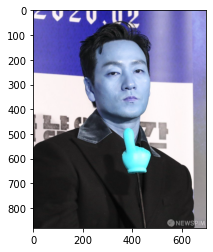

In [15]:
img = cv2.imread('.\pictures_raw_data\Park Hae-soo\Park Hae-soo - Photo Gallery (2) - Copy.jpg')
plt.imshow(img)

#### Multiple people in image no faces

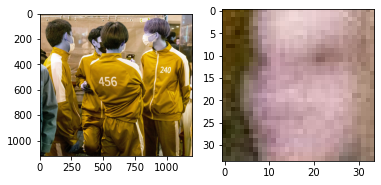

In [16]:
# obstructed
file_path = '.\pictures_raw_data\Seung Gi\List of Squid Game characters - Wikipedia.jpg'
plt.subplot(1,2,1)
plt.imshow(cv2.imread(file_path))

plt.subplot(1,2,2)
plt.imshow( crop_face(file_path) )

In [17]:
type(crop_face(file_path))

numpy.ndarray

# Renaming files

I will rename all files here to containing only latin symbols. The easiest way to do it is through Windows. Every file will contain actor's name and number. And every photo will be in the same foler. Also it is important to convert all images into a single file format otherwise, there will be problems in defining paths for files. See example below.

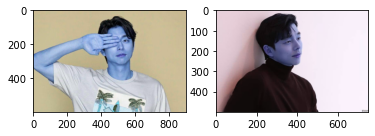

In [32]:
file_path1 = '.\pictures renamed\Gong Yoo (1).jpeg'
file_path2 = '.\pictures renamed\Gong Yoo (1).jpg'
plt.subplot(1,2,1)
plt.imshow(cv2.imread(file_path1))
plt.subplot(1,2,2)
plt.imshow(cv2.imread(file_path2))

# Importing all files, converting to jpeg and renaming

In [46]:
import glob

path_raw_data = glob.glob('.\pictures_raw_data\*\**', recursive=True)

Seems like glob.glob correctly works when names of files is not given in english

In [47]:
# list first few examples
path_raw_data[:5]

['.\\pictures_raw_data\\Gong Yoo\\',
 '.\\pictures_raw_data\\Gong Yoo\\Actor Gong Yoo Complete Profile_ Facts.jpg',
 '.\\pictures_raw_data\\Gong Yoo\\ArtStation - Gong Yoo - Squid Game.jpg',
 '.\\pictures_raw_data\\Gong Yoo\\Goblin star _Gong Yoo_ to appear in.jpg',
 '.\\pictures_raw_data\\Gong Yoo\\Gong Yoo - AsianWiki.jpg']

In [53]:
path_raw_data[1].endswith('.jpg')

True

In [54]:
os.path.splitext(path_raw_data[1])

('.\\pictures_raw_data\\Gong Yoo\\Actor Gong Yoo Complete Profile_ Facts',
 '.jpg')

In [51]:
# reference https://www.codegrepper.com/code-examples/python/convert+all+images+in+folder+to+jpg+python
from PIL import Image 
import os 

for file in path_raw_data: 
    if file.endswith(".png"): 
        img = Image.open(file)
        file_name, file_ext = os.path.splitext(file)
        img.save('./png/{}.png'.format(file_name))
    elif file.endswith(".jpeg"): 
        img = Image.open(file)
        file_name, file_ext = os.path.splitext(file)
        img.save('./png/{}.png'.format(file_name))

ValueError: unknown file extension: 